In [25]:
import practicalSPARQL
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
path_to_xlsx = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_all_ck_ucks.xlsx'

In [27]:
all_elements_with_uck = pd.read_excel(path_to_xlsx)

In [28]:
path_to_xlsx1 = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_with_part_type.xlsx'

In [29]:
all_elements_full_info = pd.read_excel(path_to_xlsx1)

In [30]:
path_to_csv = 'G:\\My Drive\\DataFiles\\booksSacrobosco.csv'

In [31]:
all_books = pd.read_csv(path_to_csv)

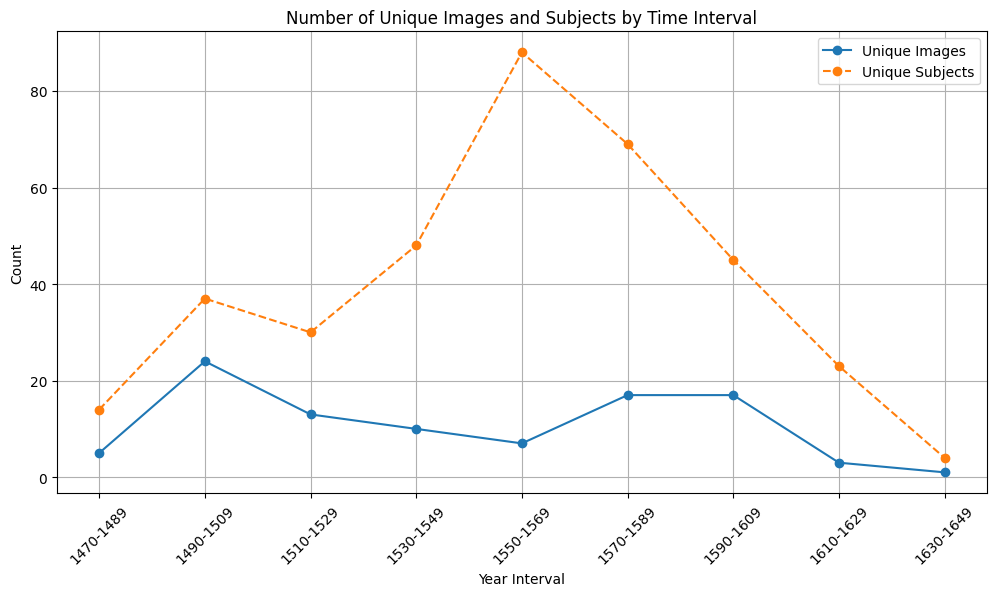

In [32]:
# Filter rows that contain the keyword 'CK_Structure of the Sublunar World'
filtered_df = all_elements_full_info[all_elements_full_info['keywords'].str.contains('CK_Structure of the Sublunar World')]

# Filter for the years 1480 to 1650
filtered_df = filtered_df[(filtered_df['year'] >= 1470) & (filtered_df['year'] <= 1650)].copy()

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals in filtered_df
filtered_df['year_interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Group by year_interval and count unique images
grouped_images = filtered_df.groupby('year_interval', observed=True)['images'].nunique().reset_index()

# Create a new column 'year_interval' to hold the 20-year intervals in all_books
all_books['year_interval'] = pd.cut(all_books['year_published_from'], bins=bins, labels=labels, right=False)

# Group by year_interval and count unique subjects
grouped_subjects = all_books.groupby('year_interval', observed=True)['subject'].nunique().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot unique images
plt.plot(grouped_images['year_interval'], grouped_images['images'], marker='o', label='Unique Images')

# Plot unique subjects
plt.plot(grouped_subjects['year_interval'], grouped_subjects['subject'], marker='o', linestyle='--', label='Unique Subjects')

plt.title('Number of Unique Images and Subjects by Time Interval')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

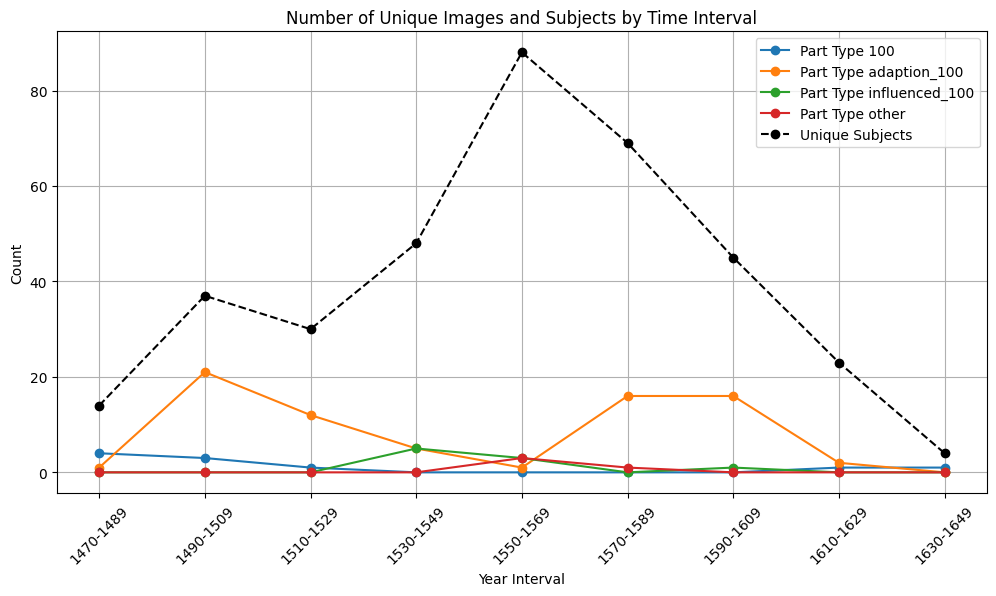

In [33]:
# Filter rows that contain the keyword 'CK_Structure of the Sublunar World'
filtered_df = all_elements_full_info[all_elements_full_info['keywords'].str.contains('CK_Structure of the Sublunar World')]

# Filter for the years 1480 to 1650
filtered_df = filtered_df[(filtered_df['year'] >= 1470) & (filtered_df['year'] <= 1650)].copy()

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals in filtered_df
filtered_df['year_interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Group by year_interval and count unique images
grouped_images = filtered_df.groupby(['year_interval', 'part_type'], observed=True)['images'].nunique().reset_index()

# Pivot the table for easier plotting
pivot_images = grouped_images.pivot(index='year_interval', columns='part_type', values='images').fillna(0)

# Create a new column 'year_interval' in all_books
all_books['year_interval'] = pd.cut(all_books['year_published_from'], bins=bins, labels=labels, right=False)

# Group by year_interval and count unique subjects
grouped_subjects = all_books.groupby('year_interval', observed=True)['subject'].nunique().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot unique images
for part_type in pivot_images.columns:
    plt.plot(pivot_images.index, pivot_images[part_type], marker='o', label=f'Part Type {part_type}')

# Plot unique subjects
plt.plot(grouped_subjects['year_interval'], grouped_subjects['subject'], marker='o', linestyle='--', color='black', label='Unique Subjects')

plt.title('Number of Unique Images and Subjects by Time Interval')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

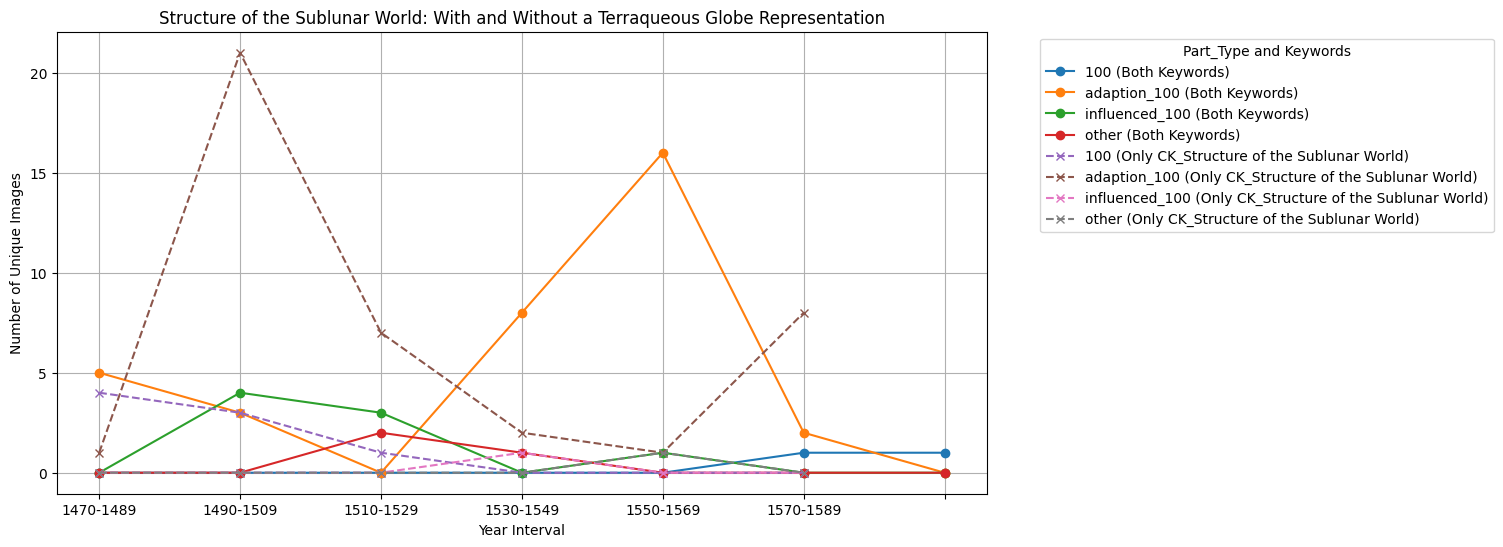

In [34]:
# Filter rows that contain the keyword 'CK_Structure of the Sublunar World'
filtered_df = all_elements_full_info[all_elements_full_info['keywords'].str.contains('CK_Structure of the Sublunar World')]

# Filter for the years 1480 to 1650
filtered_df = filtered_df[(filtered_df['year'] >= 1470) & (filtered_df['year'] <= 1650)].copy()

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals
filtered_df.loc[:, 'year_interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Filter rows that also contain 'CK_Terraqueous Globe'
both_keywords_df = filtered_df[filtered_df['keywords'].str.contains('CK_Terraqueous Globe')]

# Filter rows that only contain 'CK_Structure of the Sublunar World'
only_sublunar_df = filtered_df[~filtered_df['keywords'].str.contains('CK_Terraqueous Globe')]

# Group by interval and part_type, and count unique images
grouped_both = both_keywords_df.groupby(['year_interval', 'part_type'], observed=True)['images'].nunique().reset_index()
grouped_only = only_sublunar_df.groupby(['year_interval', 'part_type'], observed=True)['images'].nunique().reset_index()

# Pivot the tables for easier plotting
pivot_both_df = grouped_both.pivot(index='year_interval', columns='part_type', values='images').fillna(0)
pivot_only_df = grouped_only.pivot(index='year_interval', columns='part_type', values='images').fillna(0)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
for col in pivot_both_df.columns:
    pivot_both_df[col].plot(kind='line', marker='o', ax=ax, linestyle='-', label=f'{col} (Both Keywords)')
for col in pivot_only_df.columns:
    pivot_only_df[col].plot(kind='line', marker='x', ax=ax, linestyle='--', label=f'{col} (Only CK_Structure of the Sublunar World)')
plt.title('Structure of the Sublunar World: With and Without a Terraqueous Globe Representation')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.legend(title='Part_Type and Keywords', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

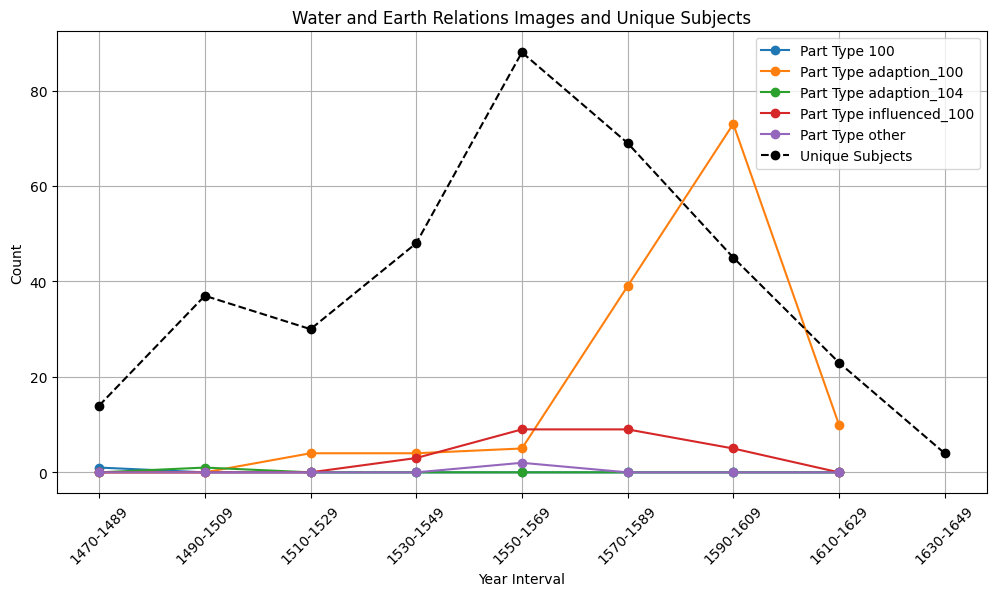

In [35]:
# Filter rows that contain the keyword 'CK_Relation Between the Spheres of Water and Earth'
water_earth = all_elements_full_info[all_elements_full_info['keywords'].str.contains('CK_Relation Between the Spheres of Water and Earth')]

# Filter for the years 1480 to 1650
water_earth = water_earth[(water_earth['year'] >= 1470) & (water_earth['year'] <= 1650)].copy()

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals in water_earth
water_earth['year_interval'] = pd.cut(water_earth['year'], bins=bins, labels=labels, right=True)

# Group by year_interval and part_type, and count unique images
grouped = water_earth.groupby(['year_interval', 'part_type'], observed=True)['images'].nunique().reset_index()

# Pivot the table for easier plotting
pivot_df = grouped.pivot(index='year_interval', columns='part_type', values='images').fillna(0)

# Create a new column 'year_interval' in all_books
all_books['year_interval'] = pd.cut(all_books['year_published_from'], bins=bins, labels=labels, right=False)

# Group by year_interval and count unique subjects
grouped_subjects = all_books.groupby('year_interval', observed=True)['subject'].nunique().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot unique images for each part_type
for part_type in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[part_type], marker='o', label=f'Part Type {part_type}')

# Plot unique subjects
plt.plot(grouped_subjects['year_interval'], grouped_subjects['subject'], marker='o', linestyle='--', color='black', label='Unique Subjects')

plt.title('Water and Earth Relations Images and Unique Subjects')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [48]:
all_elements_full_info

,images,keywords,cluster_name,authors,publishers,printers,place,year,bid,book,part_or_adaption,pagenum,bb,part_type
0,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Relations Between the Spheres of the Sun an...,SIL_03326,"Sacrobosco, Johannes de;Beyer, Hartmann",Company Heirs of Peter I. Seitz,Company Heirs of Peter I. Seitz,Wittenberg,1550,1594,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,27,"xywh=116,929,875,476",adaption_100
1,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,MVK_Pictorial_Diagrams;CK_08 Spheres;CK_Terraq...,SIL_02440,"Catena, Pietro","Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,5,"xywh=1944,1029,1376,1404",influenced_100
2,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Sphericity of the Heavens;MVK_Pictorial_Dia...,SIL_03167,"Catena, Pietro","Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,7,"xywh=2028,1340,638,601",influenced_100
3,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,MVK_Pictorial_Illustrations;MTK_Sphericity of ...,SIL_03188,"Catena, Pietro","Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,9,"xywh=1950,1422,1104,1234",influenced_100
4,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_2.8 Extended Uses of Sign;CK_Pyramid of a S...,SIL_00191,"Catena, Pietro","Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,16,"xywh=2172,1190,362,561",influenced_100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21176,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,MVK_Pictorial_Diagrams;SK_4.4 Cause of lunar e...,SIL_00267,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,339,"xywh=254,288,788,635",influenced_100
21177,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Solar Eclipse;MVK_Pictorial_Diagrams;MTK_So...,SIL_03580,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,340,"xywh=460,276,1026,1504",influenced_100
21178,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Lunar Eclipse;MVK_Pictorial_Diagrams;MTK_Lu...,SIL_03550,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,341,"xywh=130,590,1067,1575",influenced_100
21179,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Lunar Phases;MVK_Pictorial_Diagrams;MTK_Lun...,SIL_03543,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,343,"xywh=281,570,866,1617",influenced_100


In [49]:
# Filter rows that contain the keyword 'CK_Relation Between the Spheres of Water and Earth'
element_symbols = all_elements_full_info[all_elements_full_info['keywords'].str.contains('CK_Symbols of the Elements')]

In [50]:
element_symbols

,images,keywords,cluster_name,authors,publishers,printers,place,year,bid,book,part_or_adaption,pagenum,bb,part_type
1086,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,VK_Symbol;MVK_Others;SK_1.16 measuring the ear...,SIL_00541,Mauro da Firenze,"Zanetti, Bartolomeo","Zanetti, Bartolomeo",Venice,1537,1680,http://sphaera.mpiwg-berlin.mpg.de/id/item/cbb...,http://sphaera.mpiwg-berlin.mpg.de/id/part/61d...,15,"xywh=162,76,531,120",other
1115,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;CK_Symbols of the Elemen...,SIL_03624,Mauro da Firenze,"Zanetti, Bartolomeo","Zanetti, Bartolomeo",Venice,1537,1680,http://sphaera.mpiwg-berlin.mpg.de/id/item/cbb...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,20,"xywh=314,951,87,66",adaption_100
1116,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;CK_Symbols of the Elemen...,SIL_03631,Mauro da Firenze,"Zanetti, Bartolomeo","Zanetti, Bartolomeo",Venice,1537,1680,http://sphaera.mpiwg-berlin.mpg.de/id/item/cbb...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,20,"xywh=395,954,97,60",adaption_100
1117,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;CK_Symbols of the Elemen...,SIL_03622,Mauro da Firenze,"Zanetti, Bartolomeo","Zanetti, Bartolomeo",Venice,1537,1680,http://sphaera.mpiwg-berlin.mpg.de/id/item/cbb...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,20,"xywh=490,962,54,52",adaption_100
1118,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;CK_Symbols of the Elemen...,SIL_03520,Mauro da Firenze,"Zanetti, Bartolomeo","Zanetti, Bartolomeo",Venice,1537,1680,http://sphaera.mpiwg-berlin.mpg.de/id/item/cbb...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,20,"xywh=537,961,47,51",adaption_100
1121,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,VK_Symbol;MVK_Others;SK_1.16 measuring the ear...,SIL_00541,Mauro da Firenze,"Zanetti, Bartolomeo","Zanetti, Bartolomeo",Venice,1537,1680,http://sphaera.mpiwg-berlin.mpg.de/id/item/cbb...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,23,"xywh=155,810,563,93",adaption_100
1130,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,VK_Symbol;MVK_Others;SK_1.16 measuring the ear...,SIL_00541,Mauro da Firenze,"Zanetti, Bartolomeo","Zanetti, Bartolomeo",Venice,1537,1680,http://sphaera.mpiwg-berlin.mpg.de/id/item/cbb...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,37,"xywh=177,664,541,141",adaption_100
1789,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.16 measuring the earth’s circumference ;C...,SIL_02990,"Sacrobosco, Johannes de;Mauro da Firenze","Torrentino, Lorenzo","Torrentino, Lorenzo",Florence,1550,1699,http://sphaera.mpiwg-berlin.mpg.de/id/item/861...,http://sphaera.mpiwg-berlin.mpg.de/id/part/230...,31,"xywh=1155,269,275,415",influenced_100
1790,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,VK_Symbol;MVK_Others;SK_1.3 The Four Elements;...,SIL_02960,"Sacrobosco, Johannes de;Mauro da Firenze","Torrentino, Lorenzo","Torrentino, Lorenzo",Florence,1550,1699,http://sphaera.mpiwg-berlin.mpg.de/id/item/861...,http://sphaera.mpiwg-berlin.mpg.de/id/part/230...,32,"xywh=320,966,195,492",influenced_100
1791,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;CK_Symbols of the Elemen...,SIL_03019,"Sacrobosco, Johannes de;Mauro da Firenze","Torrentino, Lorenzo","Torrentino, Lorenzo",Florence,1550,1699,http://sphaera.mpiwg-berlin.mpg.de/id/item/861...,http://sphaera.mpiwg-berlin.mpg.de/id/part/230...,43,"xywh=676,515,136,280",influenced_100


C:\Users\nogas\AppData\Local\Temp\ipykernel_15644\3324038709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element_symbols['interval'] = pd.cut(element_symbols['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_15644\3324038709.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = element_symbols.groupby(['interval', 'part_type'])['images'].nunique().unstack().fillna(0)


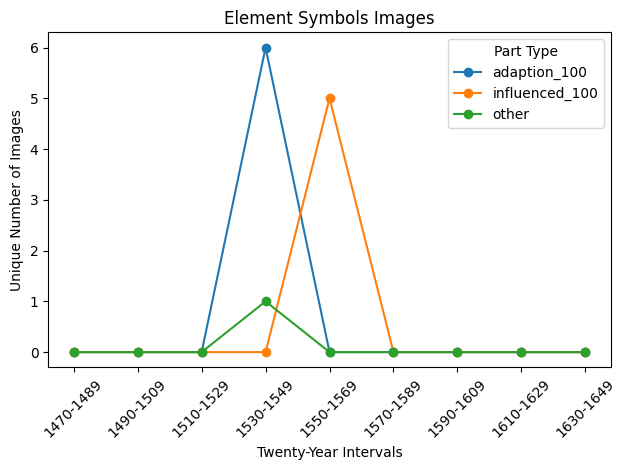

In [61]:
# Define the twenty-year intervals and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']
element_symbols['interval'] = pd.cut(element_symbols['year'], bins=bins, labels=labels, right=False)

# Group by interval and part_type, then count unique images
grouped = element_symbols.groupby(['interval', 'part_type'])['images'].nunique().unstack().fillna(0)

# Plot the data
grouped.plot(kind='line', marker='o')
plt.title('Element Symbols Images')
plt.xlabel('Twenty-Year Intervals')
plt.ylabel('Unique Number of Images')
plt.legend(title='Part Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Count unique book values
unique_books_count = element_symbols['book'].nunique()

# Print the total number of unique book values
print(f"Total number of unique book values: {unique_books_count}")

Total number of unique book values: 2


In [54]:
# Filter rows that contain the keyword 'CK_Relation Between the Spheres of Water and Earth'
element_repations = all_elements_full_info[all_elements_full_info['keywords'].str.contains('CK_Qualities of the Aristotelian Elements')]

In [55]:
element_repations

,images,keywords,cluster_name,authors,publishers,printers,place,year,bid,book,part_or_adaption,pagenum,bb,part_type
589,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Qualities of the Aristotelian Elements;SK_1...,SIL_03353,"d'Étaples, Jacques Lefèvre;Regiomontanus, Joha...",Company Heirs of Ottaviano Scoto I.,Company Heirs of Ottaviano Scoto I.,Venice,1518,1659,http://sphaera.mpiwg-berlin.mpg.de/id/item/814...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,62,"xywh=2157,1979,1168,1186",other
3235,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Qualities of the Aristotelian Elements;SK_1...,SIL_02190,"Sacrobosco, Johannes de;Clavius, Christoph",Brothers Gabiano,"Julliéron, Guichard",Lyon,1593,1746,http://sphaera.mpiwg-berlin.mpg.de/id/item/e2f...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,46,"xywh=689,1309,2347,2314",adaption_100
3561,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Qualities of the Aristotelian Elements;SK_1...,SIL_02190,"Sacrobosco, Johannes de;Clavius, Christoph","Crispin, Samuel","Crispin, Samuel",Saint Gervais,1607,1755,http://sphaera.mpiwg-berlin.mpg.de/id/item/368...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,47,"xywh=279,864,1591,1554",adaption_100
4590,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Qualities of the Aristotelian Elements;SK_1...,SIL_02190,"Sacrobosco, Johannes de;Clavius, Christoph","Eliano, Vittorio","Eliano, Vittorio",Rome,1570,1806,http://sphaera.mpiwg-berlin.mpg.de/id/item/1c4...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,59,"xywh=96,456,605,594",adaption_100
4697,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Qualities of the Aristotelian Elements;SK_1...,SIL_02190,"Sacrobosco, Johannes de;Clavius, Christoph",Company Francesco Zanetti & Domenico Basa,Company Francesco Zanetti & Domenico Basa,Rome,1581,1807,http://sphaera.mpiwg-berlin.mpg.de/id/item/0a8...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,70,"xywh=140,376,632,628",adaption_100
4820,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Qualities of the Aristotelian Elements;SK_1...,SIL_02190,"Sacrobosco, Johannes de;Clavius, Christoph","Basa, Domenico","Basa, Domenico",Rome,1585,1808,http://sphaera.mpiwg-berlin.mpg.de/id/item/516...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,69,"xywh=139,644,1148,1152",adaption_100
4923,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Qualities of the Aristotelian Elements;SK_1...,SIL_02190,"Sacrobosco, Johannes de;Clavius, Christoph","Ciotti, Giovanni Battista","Ciotti, Giovanni Battista",Venice,1591,1809,http://sphaera.mpiwg-berlin.mpg.de/id/item/bbd...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,70,"xywh=248,1321,1768,1732",adaption_100
5027,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Qualities of the Aristotelian Elements;SK_1...,SIL_02190,"Sacrobosco, Johannes de;Clavius, Christoph",Brothers Gabiano,"Julliéron, Guichard",Lyon,1594,1810,http://sphaera.mpiwg-berlin.mpg.de/id/item/002...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,46,"xywh=92,522,990,994",adaption_100
5142,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Qualities of the Aristotelian Elements;SK_1...,SIL_02190,"Sacrobosco, Johannes de;Clavius, Christoph","Basa, Bernardo","Basa, Bernardo",Venice,1596,1811,http://sphaera.mpiwg-berlin.mpg.de/id/item/a87...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,69,"xywh=81,708,1191,1153",adaption_100
5246,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Qualities of the Aristotelian Elements;SK_1...,SIL_02190,"Sacrobosco, Johannes de;Clavius, Christoph","Basa, Isabetta","Ciotti, Giovanni Battista",Venice,1601,1812,http://sphaera.mpiwg-berlin.mpg.de/id/item/810...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,70,"xywh=168,509,1025,960",adaption_100


In [56]:
# Count unique book values
unique_books_count = element_repations['book'].nunique()

# Print the total number of unique book values
print(f"Total number of unique book values: {unique_books_count}")

Total number of unique book values: 37


C:\Users\nogas\AppData\Local\Temp\ipykernel_15644\1419313226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element_repations['interval'] = pd.cut(element_repations['year'], bins=bins, labels=labels, right=True)
C:\Users\nogas\AppData\Local\Temp\ipykernel_15644\1419313226.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = element_repations.groupby(['interval', 'part_type'])['images'].nunique().unstack().fillna(0)


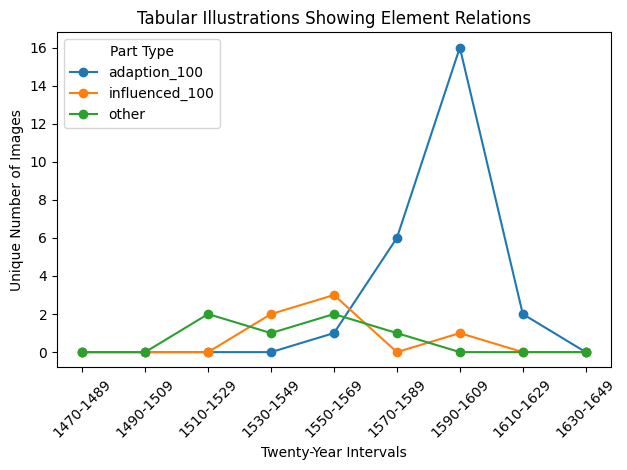

In [59]:
# Define the twenty-year intervals and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']
element_repations['interval'] = pd.cut(element_repations['year'], bins=bins, labels=labels, right=True)

# Group by interval and part_type, then count unique images
grouped = element_repations.groupby(['interval', 'part_type'])['images'].nunique().unstack().fillna(0)

# Plot the data
grouped.plot(kind='line', marker='o')
plt.title('Tabular Illustrations Showing Element Relations')
plt.xlabel('Twenty-Year Intervals')
plt.ylabel('Unique Number of Images')
plt.legend(title='Part Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()